# STEMMING AND LEMMATIZATION

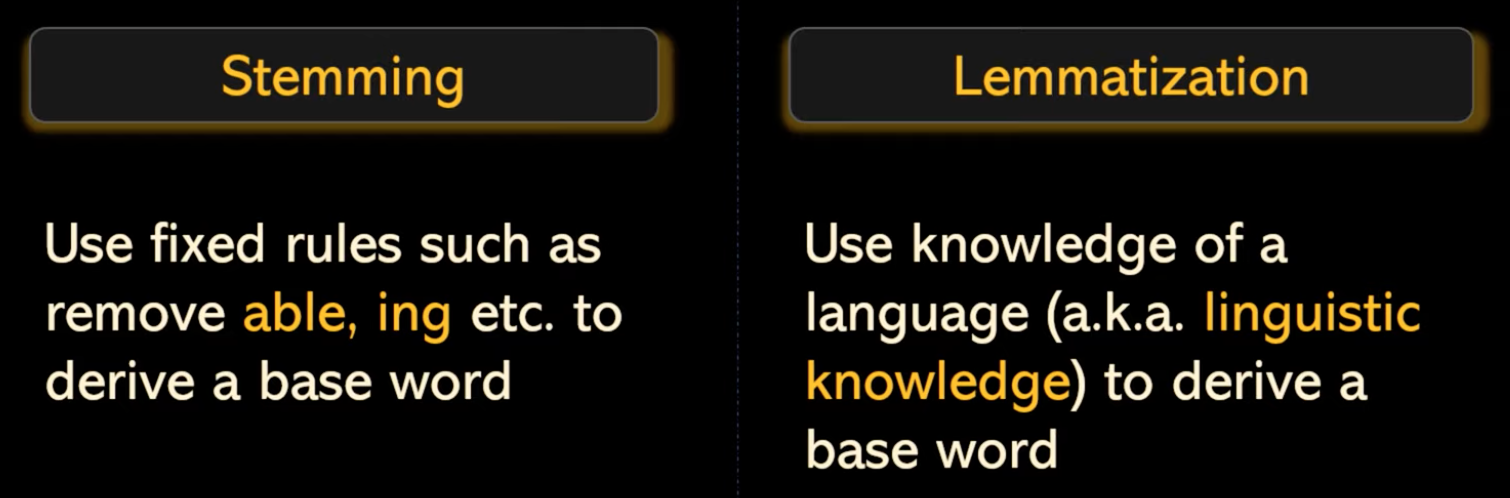

## Stemming in NLTK

In [10]:
from nltk.stem import PorterStemmer 
from nltk.stem import LancasterStemmer 

In [11]:
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [12]:
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))


Word                Porter Stemmer      lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


### PorterStemmer is known for its simplicity and speed.It is commonly useful in Information Retrieval Environments known as IR Environments for fast recall and fetching of search queries


### The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally. One table containing about 120 rules indexed by the last letter of a suffix. On each iteration, it tries to find an applicable rule by the last character of the word. Each rule specifies either a deletion or replacement of an ending. If there is no such rule, it terminates. It also terminates if a word starts with a vowel and there are only two letters left or if a word starts with a consonant and there are only three characters left. Otherwise, the rule is applied, and the process repeats.

### LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning.

# Lemmatization in Spacy

In [13]:
import spacy

In [19]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("Mando talked for 3 hours although talking isn't his thing")
doc = nlp("eating eats eat ate adjustable rafting ability meeting better")
for token in doc:
    print(token,"|",token.lemma_)

eating | eating
eats | eat
eat | eat
ate | eat
adjustable | adjustable
rafting | raft
ability | ability
meeting | meeting
better | well


## Customizing lemmatizer

In [20]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [21]:
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{"TEXT":"Bro"}],[{"TEXT":"Brah"}]],{"LEMMA":"Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token.text, "|", token.lemma_)

Bro | Brother
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brother
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


In [22]:
doc[6]

Brah

In [23]:
doc[6].lemma_

'Brother'